# Reproducible analysis

After merging sets sharing "DeJager_Mic_ENSG00000130203", "Kellis_Mic_ENSG00000130203", "DeJager_Mic_ENSG00000130208", "Kellis_Mic_ENSG00000130208", we can get a set with 60 variants that including both reported variants in CS3 and CS4.

In [3]:
library(tidyverse)
variants <- c(
  'chr19:44938353:A:C', 'chr19:44939092:T:C', 'chr19:44939262:A:T', 'chr19:44939831:G:C', 'chr19:44940247:A:G',
  'chr19:44940390:T:C', 'chr19:44940660:A:ATTGTT', 'chr19:44941309:G:T', 'chr19:44943014:C:T', 'chr19:44945208:T:G',
  'chr19:44946027:T:G', 'chr19:44946776:C:T', 'chr19:44947615:A:G', 'chr19:44947671:T:C', 'chr19:44948185:A:G',
  'chr19:44948363:T:A', 'chr19:44949887:C:T', 'chr19:44949894:T:G', 'chr19:44949908:C:T', 'chr19:44950979:G:A',
  'chr19:44951106:G:A', 'chr19:44951502:A:G', 'chr19:44951509:G:A', 'chr19:44952201:G:A', 'chr19:44952844:G:A',
  'chr19:44952989:T:C', 'chr19:44953240:T:C', 'chr19:44953684:G:A', 'chr19:44953848:A:G', 'chr19:44953923:T:C',
  'chr19:44953968:G:A', 'chr19:44954036:C:T', 'chr19:44954049:C:T', 'chr19:44954062:G:A', 'chr19:44954120:G:A',
  'chr19:44954150:CA:CAAAAA', 'chr19:44954427:G:C', 'chr19:44962801:T:C', 'chr19:44963328:ATT:AT', 'chr19:44967657:CAA:CA',
  'chr19:44980181:A:C', 'chr19:44983921:C:T', 'chr19:44986934:A:G', 'chr19:44987312:A:G', 'chr19:44987378:T:C',
  'chr19:44987916:A:G', 'chr19:44989803:T:C', 'chr19:44992424:A:G', 'chr19:44993518:A:G', 'chr19:44996130:T:C',
  'chr19:44999110:TAAAA:TAA', 'chr19:45001091:C:G', 'chr19:44951028:TAA:TA', 'chr19:44972443:G:T', 'chr19:44978409:CA:CAAA',
  'chr19:44979627:T:C', 'chr19:44989301:G:A', 'chr19:45000581:CT:CTT', 'chr19:44957507:G:A', 'chr19:44967087:C:T'
)

In [22]:
'chr19:44945208:T:G' %in% variants

[1] TRUE

In [5]:
library(tidyverse)
library(data.table)
library(vroom)
library(vctrs)
library(susieR)
library(matrixStats)
for(file in list.files("/home/xc2270/COLOCBoost/pipeline/error/pecotmr", full.names = T)) {source(file)}

## Loading GWAS sumstat information

In [6]:
# - summary statistics
studies = c("AD_Bellenguez", "AD_Kunkle_Stage1_2019", "AD_Wightman_Full_2021", "AD_Wightman_Excluding23andMe_2021", 
                    "AD_Wightman_ExcludingUKBand23andME_2021", "AD_Bellenguez_EADB")
sumstat_path_list = c('/mnt/jast/hpc/gaowang/users/xc2270/colocboost/pipeline/sumstat/AD_Bellenguez_2022.sumstats.tsv.gz',
                      '/mnt/jast/hpc/gaowang/users/xc2270/colocboost/pipeline/sumstat/Kunkle_etal_Stage1_results.txt_file_1_hg38.sorted.txt.gz',
                      '/mnt/jast/hpc/gaowang/users/xc2270/colocboost/pipeline/sumstat/PGCALZ2full.hg38.sorted.txt.gz',
                      '/mnt/jast/hpc/gaowang/users/xc2270/colocboost/pipeline/sumstat/PGCALZ2sumstatsExcluding23andMe.hg38.sorted.txt.gz',
                      '/mnt/jast/hpc/gaowang/users/xc2270/colocboost/pipeline/sumstat/PGCALZ2ExcludingUKBand23andME_METALInverseVariance_MetaAnalysis.hg38.sorted.txt.gz',
                      '/mnt/jast/hpc/gaowang/users/xc2270/colocboost/pipeline/sumstat/EADB_core.tsv.gz')
column_file_path_list = c('/home/xc2270/COLOCBoost/pipeline/Bellenguez_new.yml',
                          '/mnt/vast/hpc/csg/data_public/GWAS_sumstats/GWAS_sumstat_column_mapping/Kunkle_stage_1.yml',
                          '/mnt/vast/hpc/csg/data_public/GWAS_sumstats/GWAS_sumstat_column_mapping/AD_Wightman_Full_2021.yml',
                          '/mnt/vast/hpc/csg/data_public/GWAS_sumstats/GWAS_sumstat_column_mapping/AD_Wightman_Excluding23andMe_2021.yml',
                          '/mnt/vast/hpc/csg/data_public/GWAS_sumstats/GWAS_sumstat_column_mapping/AD_Wightman_ExcludingUKBand23andME_2021.yml',
                          '/mnt/vast/hpc/csg/data_public/GWAS_sumstats/GWAS_sumstat_column_mapping/EADB.yml')
# Replace _regions with _meta_info[1] which is the association window region
n_samples = c('0','0','0','0','0','0') %>% as.numeric
n_cases = c('111326','21982','90338','86531','39918','20301') %>% as.numeric
n_controls = c('677663','41944','1036225','676386','358140','21839') %>% as.numeric

gwas_meta <- data.frame(
    "study_id" = studies,
    "file_path" = sumstat_path_list,
    "column_mapping_file" = column_file_path_list,
    "n_sample" = n_samples,
    "n_case" = n_cases,
    "n_control" = n_controls
)

## Analysis in a larger region - EADB for reproducible analysis

In [7]:
ldblock<-load_LD_matrix('/mnt/jast/hpc/gaowang/users/xc2270/transQTL/APOE/in_Iris/ld_meta_file_apoe.tsv',
                         region = data.frame(chr='chr19', start=42346101, end=46842901))

Rows: 1 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): #chrom, path
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
impute_opts=list(rcond = 0.01, R2_threshold = 0.6, minimum_ld = 5, lamb = 0.01)
qc_method='rss_qc'
association_window = "chr19:42346101-46842901"
sumstats_region_name_col = NULL
comment_string = NULL
extract_sumstats_region_name = NULL

In [10]:
gwas = gwas_meta$study_id[6]
sumstat_path=gwas_meta %>% filter(study_id==gwas) %>% pull(file_path)
column_file_path=gwas_meta %>% filter(study_id==gwas) %>% pull(column_mapping_file)
n_sample=gwas_meta %>% filter(study_id==gwas) %>% pull(n_sample)
n_case=gwas_meta %>% filter(study_id==gwas) %>% pull(n_case)
n_control=gwas_meta %>% filter(study_id==gwas) %>% pull(n_control)
message(gwas)

AD_Bellenguez_EADB



In [11]:
sumstat_path=gwas_meta %>% filter(study_id==gwas) %>% pull(file_path)
column_file_path=gwas_meta %>% filter(study_id==gwas) %>% pull(column_mapping_file)
n_sample=gwas_meta %>% filter(study_id==gwas) %>% pull(n_sample)
n_case=gwas_meta %>% filter(study_id==gwas) %>% pull(n_case)
n_control=gwas_meta %>% filter(study_id==gwas) %>% pull(n_control)

#get summstats
rss_input <- load_rss_data(
  sumstat_path = sumstat_path, column_file_path = column_file_path,
  n_sample = n_sample, n_case = n_case, n_control = n_control,
  region = association_window
)
message(rss_input$n)
# Preprocess the input data
preprocess_results <- rss_basic_qc(rss_input$sumstats, ldblock)

#if zscore =Inf, transform as the max value
max(preprocess_results$sumstats$z[!is.infinite(preprocess_results$sumstats$z)])
if(any(is.infinite(preprocess_results$sumstats$z))){
message(sum(is.infinite(preprocess_results$sumstats$z)),' variants have infinite zscore, exclude them')
preprocess_results$sumstats<-preprocess_results$sumstats[!is.infinite(preprocess_results$sumstats$z),]
preprocess_results$LD_mat=preprocess_results$LD_mat[preprocess_results$sumstats$variant_id,preprocess_results$sumstats$variant_id]
}

# Perform Slalom quality control
qc_results <- summary_stats_qc(preprocess_results$sumstats, list(combined_LD_matrix=preprocess_results$LD_mat), n = rss_input$n,
                             var_y = rss_input$var_y,
                             method = qc_method)

Taking input= as a system command because it contains a space ('zcat /mnt/jast/hpc/gaowang/users/xc2270/colocboost/pipeline/sumstat/EADB_core.tsv.gz | head -1 && tabix /mnt/jast/hpc/gaowang/users/xc2270/colocboost/pipeline/sumstat/EADB_core.tsv.gz 19:42346101-46842901'). If it's a filename please remove the space, or use file= explicitly. A variable is being passed to input= and when this is taken as a system command there is a security concern if you are creating an app, the app could have a malicious user, and the app is not running in a secure environment; e.g. the app is running as root. Please read item 5 in the NEWS file for v1.11.6 for more information and for the option to suppress this message.

Region chr19:42346101-46842901 include 36770 in input sumstats.

42140



[1] 63.7703

In [13]:
pp_cos <- which( paste0("chr", preprocess_results$sumstats$variant_id) %in% variants )
pp_cos %>% head

[1] 12239 12240 12242 12247 12253 12260

In [14]:
# pp_cos <- which( qc_results$sumstats$variant_alternate_id %in% cos_idx )
sumstats_obs <- qc_results$sumstats[pp_cos, ]
qc_results$sumstats <- qc_results$sumstats[-pp_cos, ]
impute_results <- raiss(ldblock$ref_panel, qc_results$sumstats, ldblock$combined_LD_matrix,
              rcond = impute_opts$rcond,
              R2_threshold = impute_opts$R2_threshold,
              minimum_ld = impute_opts$minimum_ld, lamb = impute_opts$lamb)
ll <- list(summstats=data.table(impute_results$result_filter),
           sumstats_obs = sumstats_obs,
           outlier_number=qc_results$outlier_number)

Processing single LD matrix...

IMPUTATION REPORT


Variants before filter:                    4166

Non-imputed variants:                      0

Imputed variants:                          4166

Variants filtered because of low LD score: 785

Variants filtered because of low R2:       1800

Remaining variants after filter:           2366



In [15]:
z_imp <- impute_results$result_filter %>% filter(paste0("chr", variant_id) %in% variants ) %>% pull(z)
names(z_imp) <- impute_results$result_filter %>% filter(paste0("chr", variant_id) %in% variants) %>% pull(variant_id)
z_original <- sumstats_obs %>% pull(z)
names(z_original) <- sumstats_obs %>% pull(variant_id)
ov <- intersect(names(z_imp), names(z_original))
imp_data <- data.frame(
    variant_id = ov,
    z_imp = z_imp[match(ov, names(z_imp))],
    z_original = z_original[match(ov, names(z_original))]
)
imp_data %>% dim
imp_data %>% head

[1] 42  3

,variant_id,z_imp,z_original
,<chr>,<dbl>,<dbl>
19:44939092:T:C,19:44939092:T:C,9.730234,9.361135
19:44939831:G:C,19:44939831:G:C,9.749849,9.337308
19:44940247:A:G,19:44940247:A:G,9.552911,9.281704
19:44941309:G:T,19:44941309:G:T,9.536545,9.277907
19:44943014:C:T,19:44943014:C:T,9.491535,9.180963
19:44945208:T:G,19:44945208:T:G,9.576777,9.652020


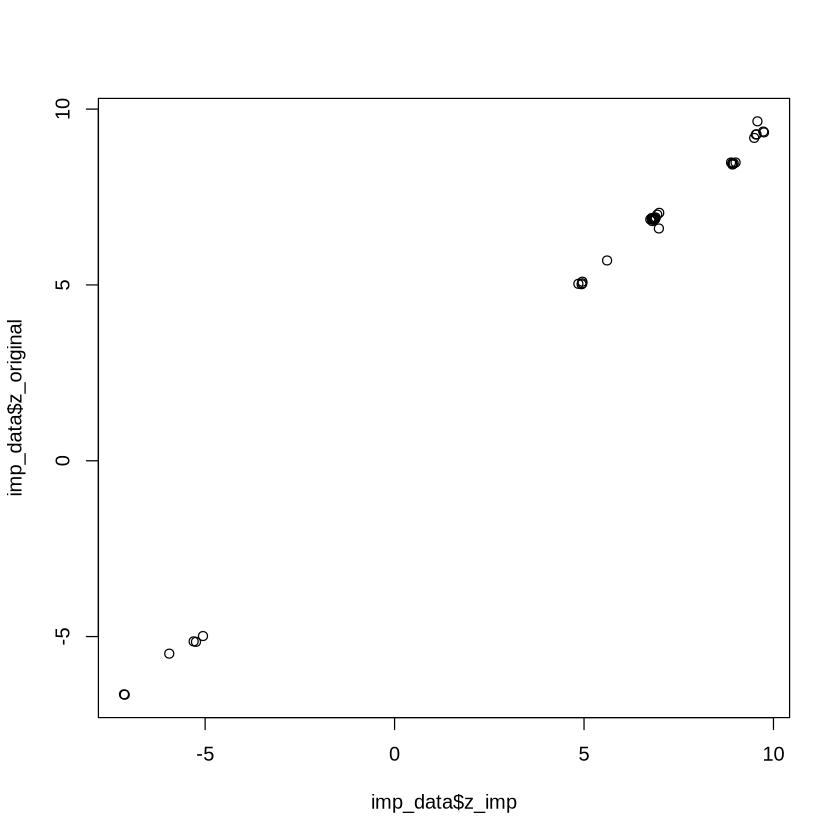

In [16]:
plot(imp_data$z_imp, imp_data$z_original)

In [24]:
'19:44945208:T:G' %in% ov
imp_data %>% filter(variant_id == '19:44945208:T:G')

[1] TRUE

,variant_id,z_imp,z_original
,<chr>,<dbl>,<dbl>
19:44945208:T:G,19:44945208:T:G,9.576777,9.65202


## Analysis under +- 50kb region

In [26]:
start.reg=44905791-50000
end.reg=44909393+50000
reg=paste('chr19',start.reg,end.reg,sep='-')
association_window = paste0("chr19:", start.reg, "-", end.reg)
association_window

[1] "chr19:44855791-44959393"

In [27]:
#get summstats
rss_input <- load_rss_data(
  sumstat_path = sumstat_path, column_file_path = column_file_path,
  n_sample = n_sample, n_case = n_case, n_control = n_control,
  region = association_window
)
message(rss_input$n)
# Preprocess the input data
preprocess_results <- rss_basic_qc(rss_input$sumstats, ldblock)

#if zscore =Inf, transform as the max value
max(preprocess_results$sumstats$z[!is.infinite(preprocess_results$sumstats$z)])
if(any(is.infinite(preprocess_results$sumstats$z))){
message(sum(is.infinite(preprocess_results$sumstats$z)),' variants have infinite zscore, exclude them')
preprocess_results$sumstats<-preprocess_results$sumstats[!is.infinite(preprocess_results$sumstats$z),]
preprocess_results$LD_mat=preprocess_results$LD_mat[preprocess_results$sumstats$variant_id,preprocess_results$sumstats$variant_id]
}

# Perform Slalom quality control
qc_results <- summary_stats_qc(preprocess_results$sumstats, list(combined_LD_matrix=preprocess_results$LD_mat), n = rss_input$n,
                             var_y = rss_input$var_y,
                             method = qc_method)

Taking input= as a system command because it contains a space ('zcat /mnt/jast/hpc/gaowang/users/xc2270/colocboost/pipeline/sumstat/EADB_core.tsv.gz | head -1 && tabix /mnt/jast/hpc/gaowang/users/xc2270/colocboost/pipeline/sumstat/EADB_core.tsv.gz 19:44855791-44959393'). If it's a filename please remove the space, or use file= explicitly. A variable is being passed to input= and when this is taken as a system command there is a security concern if you are creating an app, the app could have a malicious user, and the app is not running in a secure environment; e.g. the app is running as root. Please read item 5 in the NEWS file for v1.11.6 for more information and for the option to suppress this message.

Region chr19:44855791-44959393 include 917 in input sumstats.

42140



[1] 63.7703

In [28]:
pp_cos <- which( paste0("chr", preprocess_results$sumstats$variant_id) %in% variants )
pp_cos %>% head

[1] 383 384 386 391 397 404

In [29]:
# pp_cos <- which( qc_results$sumstats$variant_alternate_id %in% cos_idx )
sumstats_obs <- qc_results$sumstats[pp_cos, ]
qc_results$sumstats <- qc_results$sumstats[-pp_cos, ]
impute_results <- raiss(ldblock$ref_panel, qc_results$sumstats, ldblock$combined_LD_matrix,
              rcond = impute_opts$rcond,
              R2_threshold = impute_opts$R2_threshold,
              minimum_ld = impute_opts$minimum_ld, lamb = impute_opts$lamb)
ll <- list(summstats=data.table(impute_results$result_filter),
           sumstats_obs = sumstats_obs,
           outlier_number=qc_results$outlier_number)

Processing single LD matrix...

IMPUTATION REPORT


Variants before filter:                    23974

Non-imputed variants:                      0

Imputed variants:                          23974

Variants filtered because of low LD score: 23758

Variants filtered because of low R2:       23662

Remaining variants after filter:           210



In [30]:
z_imp <- impute_results$result_filter %>% filter(paste0("chr", variant_id) %in% variants ) %>% pull(z)
names(z_imp) <- impute_results$result_filter %>% filter(paste0("chr", variant_id) %in% variants) %>% pull(variant_id)
z_original <- sumstats_obs %>% pull(z)
names(z_original) <- sumstats_obs %>% pull(variant_id)
ov <- intersect(names(z_imp), names(z_original))
imp_data <- data.frame(
    variant_id = ov,
    z_imp = z_imp[match(ov, names(z_imp))],
    z_original = z_original[match(ov, names(z_original))]
)
imp_data %>% dim
imp_data %>% head

[1] 28  3

,variant_id,z_imp,z_original
,<chr>,<dbl>,<dbl>
19:44939092:T:C,19:44939092:T:C,9.764637,9.361135
19:44939831:G:C,19:44939831:G:C,9.838674,9.337308
19:44940247:A:G,19:44940247:A:G,9.751125,9.281704
19:44941309:G:T,19:44941309:G:T,9.677477,9.277907
19:44943014:C:T,19:44943014:C:T,9.707709,9.180963
19:44945208:T:G,19:44945208:T:G,9.608020,9.652020


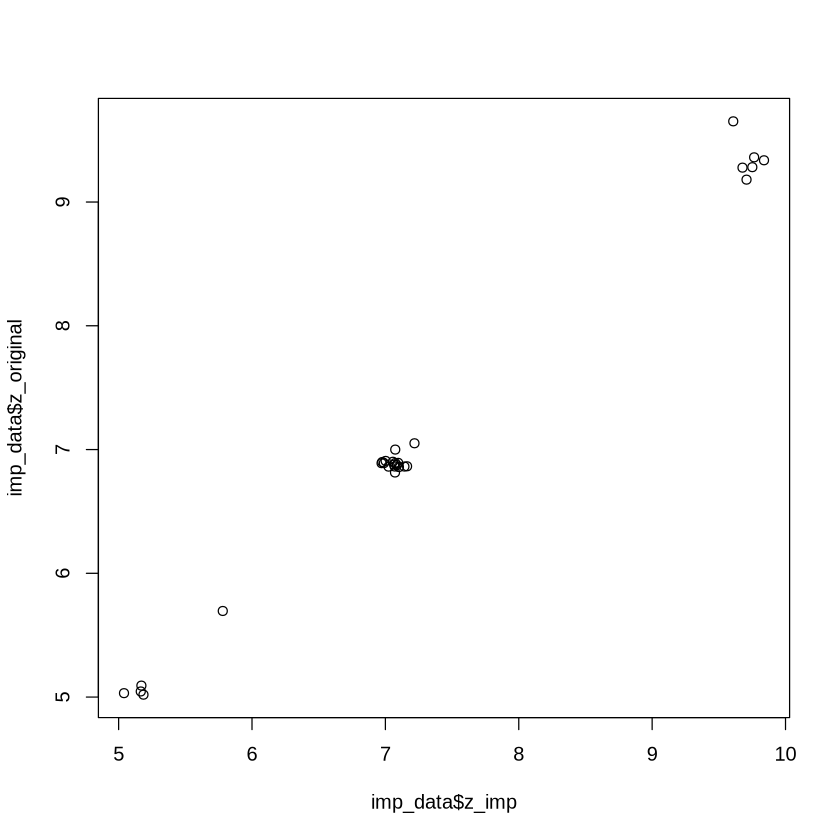

In [31]:
plot(imp_data$z_imp, imp_data$z_original)

In [32]:
'19:44945208:T:G' %in% ov
imp_data %>% filter(variant_id == '19:44945208:T:G')

[1] TRUE

,variant_id,z_imp,z_original
,<chr>,<dbl>,<dbl>
19:44945208:T:G,19:44945208:T:G,9.60802,9.65202
